In [1]:
from img_data_class import ImageDataset
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import make_grid
import torch
from torch import nn
import matplotlib.pyplot as plt
from model_class import ConditionalVAE
import torch.optim as optim
import torch.nn.functional as F
import tqdm

c:\Users\Tomislav\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tr = transforms.Compose(
    [
     transforms.Resize((256,256)),
     transforms.ToTensor(),
    #  transforms.Normalize(
    #        [0.5 for _ in range(1)], [0.5 for _ in range(1)]),
    ],
    )


In [3]:
train = ImageDataset('data/train',tr)

In [4]:
train_dl = DataLoader(train,5,shuffle=True)

In [5]:
model = ConditionalVAE(3,1024,None)

In [6]:
for img in train_dl:
    y = model(img)
    break

In [14]:
merge_tensors = torch.cat((img,y[0]),dim=0)

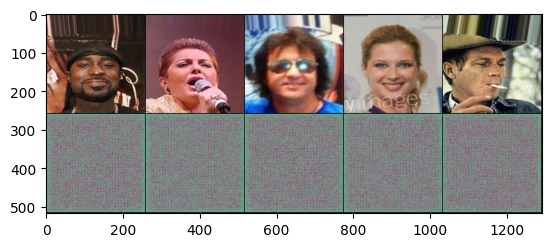

In [19]:
plt.imshow(make_grid(merge_tensors,nrow=5).permute(1,2,0))
plt.savefig('test.png')

In [7]:
y[0].shape

torch.Size([5, 3, 256, 256])

In [8]:
encoded_img = model.encoder(img)

In [9]:
encoded_img.shape

torch.Size([5, 512, 16, 16])

In [10]:
encoded_img.flatten(1).view(-1,512,16,16).shape

torch.Size([5, 512, 16, 16])

In [11]:
decoded_img = model.decoder(encoded_img)

In [12]:
decoded_img.shape

torch.Size([5, 3, 256, 256])